<div style="text-align: center;">
    <h1 style="font-size:50px">Car Sales Price Project</h1>
</div>

<h1>Objective</h1>

<p style="font-size:15px;line-height: 1.5;">The objective of this project is to develop machine learning models capable of accurately predicting the price of cars based on various features and specifications. The aim is to provide car buyers and sellers with reliable price estimates, aiding in informed decision-making.</p>

<h1>Dataset</h1>

<p style="font-size:15px;line-height: 1.5;">The dataset consists of 301 rows and 9 columns.</p>

<ul style="font-size:15px;line-height: 1.5;">
    <li><b>Features</b>: Car Name, Year, Present Price, Kms Driven, Fuel Type (Petrol, Diesel and CNG), Selling Type (Dealer and Individual), Transmission (Manual and Automatic), Owner (0,1and 3)</li>
    <li><b>Target</b>: Selling Price of Cars.</li>
</ul>

<h1>Approach</h1>

<ul style="font-size:15px;line-height: 1.5;">
    <li>First, the dataset is explored to understand its structure.</li>
    <li>Visualization of the dataset is done to show the relation between features and target variables.</li>
    <li>Pre-Processing of dataset is done by encoding the categorical data and splitting the dataset into training and testing sets in 7:3 ratio.</li>
    <li>6 different models are used for price prediction:
        <ul style="font-size:15px;line-height: 1.5;">
            <li>Linear Regressor</li>
            <li>Lasso Regressor</li>
            <li>Decision Tree Regressor</li>
            <li>Random Forest Regressor</li>
            <li>Support Vector Regressor</li>
            <li>K-Nearest Neighbors Regressor</li>
        </ul>
    </li>
    <li>Each model is saved as a '.pkl' file.</li>
    <li>Users will be prompted to load the model of their choice and enter the corresponding features in an interactive manner to make predictions.</li>
</ul>

# Import The Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

# Load The Dataset

In [2]:
dataset = pd.read_csv('car data.csv')
dataset

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


# Printing Information About The Dataset

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


# Check For Missing Values

In [4]:
dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

# Statistics Of Dataset Like Mean, Median, etc.

In [5]:
dataset.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


# Visualization Of Dataset

### Car Names And Their Counts

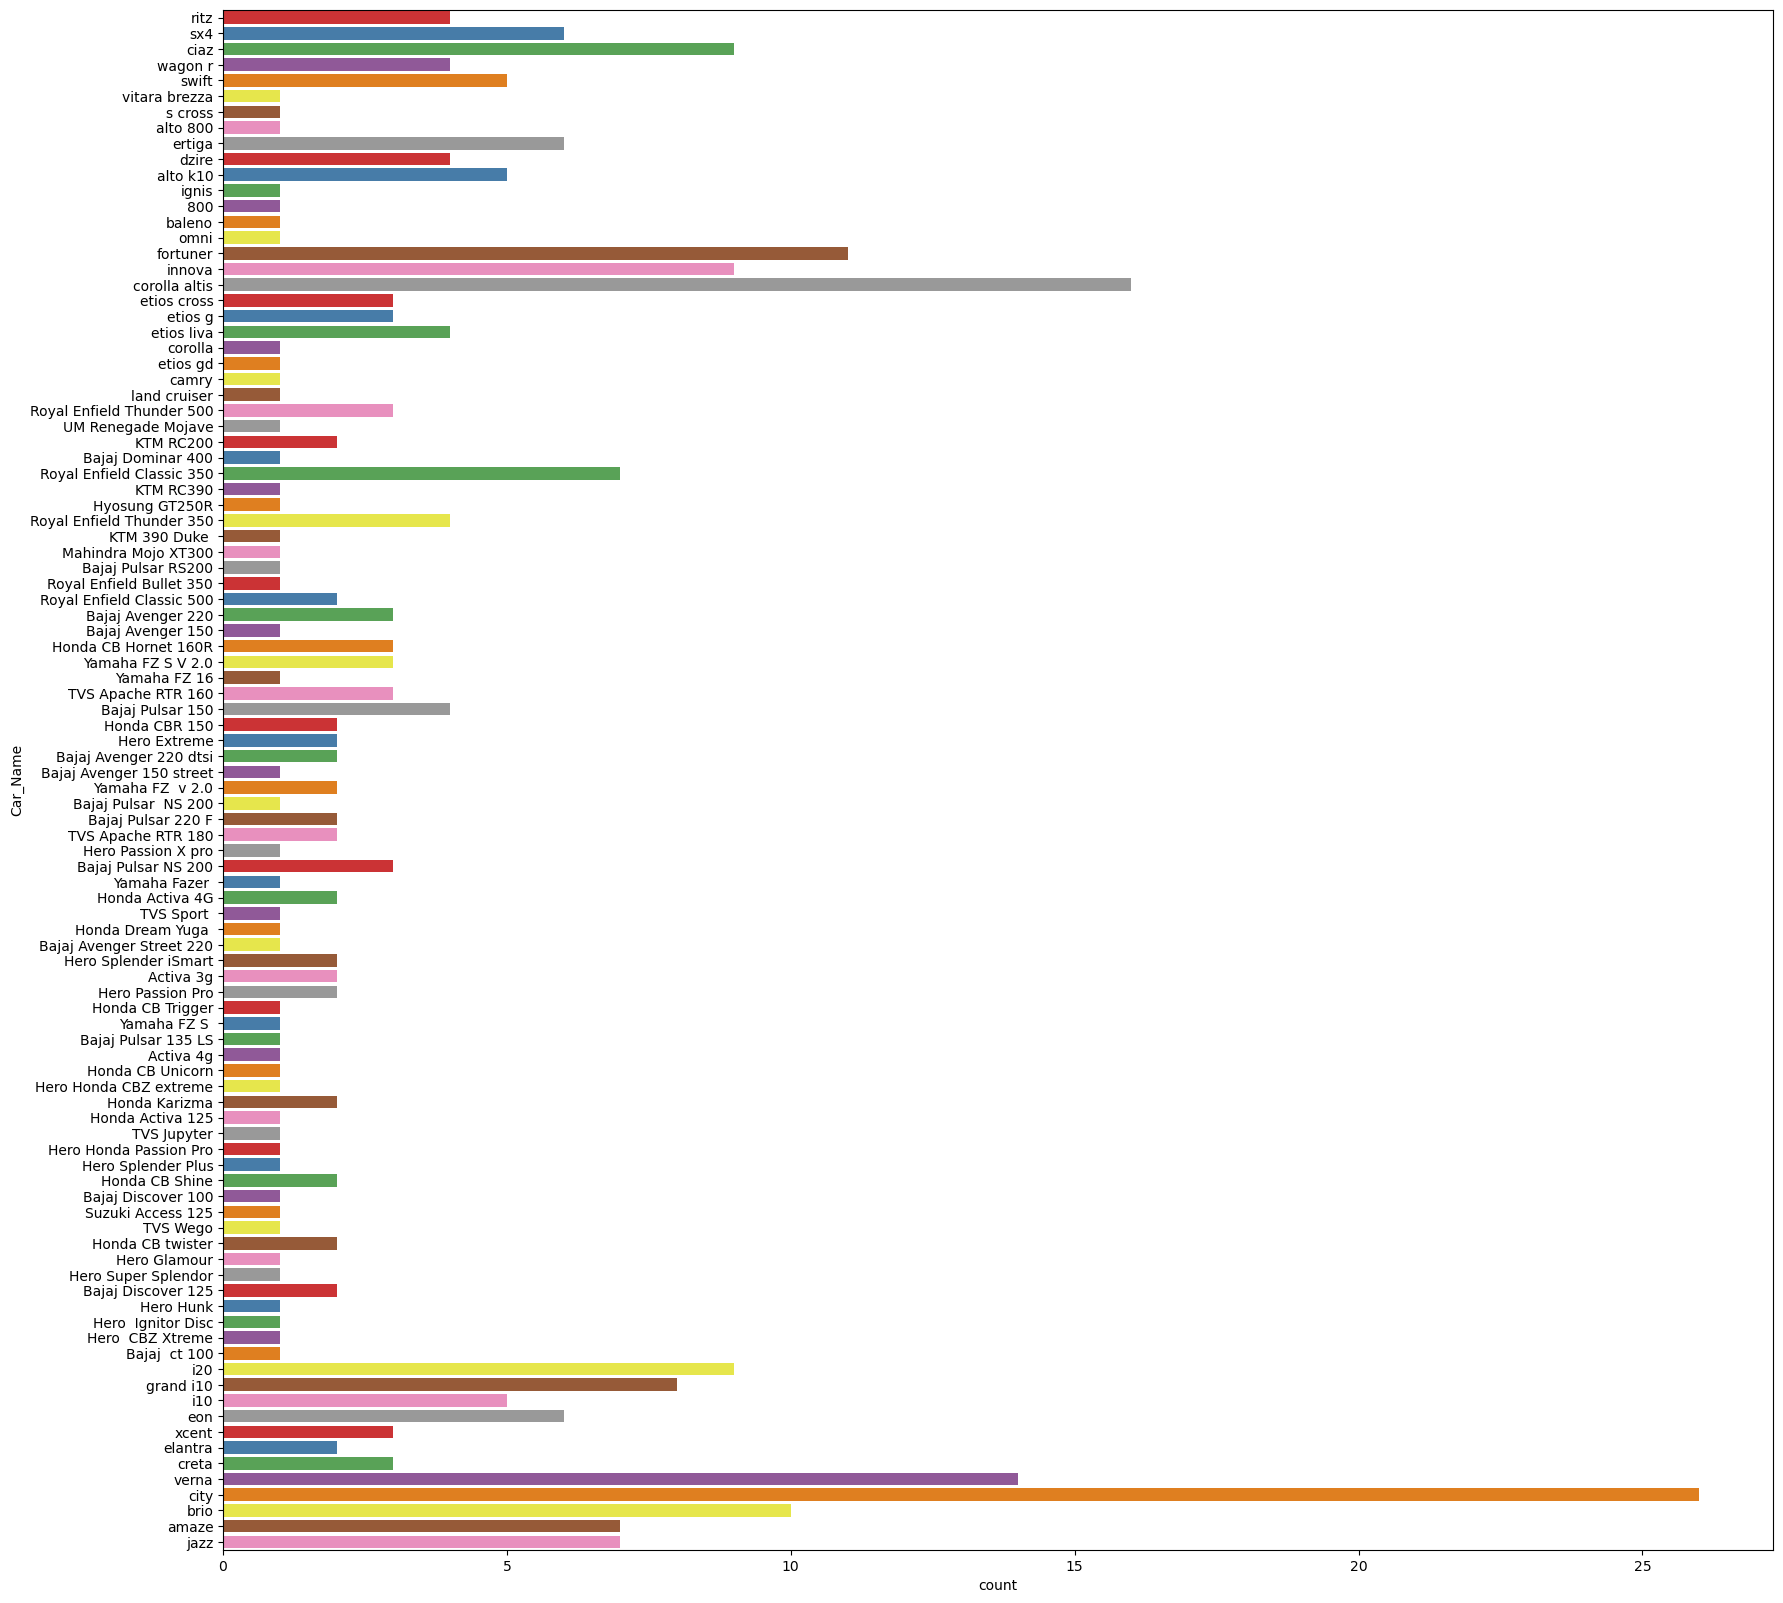

In [6]:
plt.figure(figsize=(20,20))
sns.countplot(y='Car_Name', data=dataset, palette='Set1')
plt.show()

### Years and Their Count

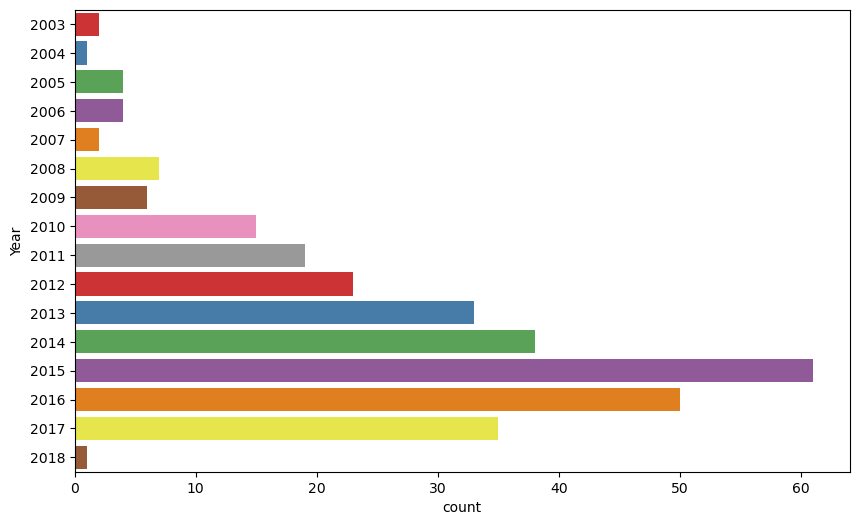

In [7]:
plt.figure(figsize=(10,6))
sns.countplot(y='Year', data=dataset, palette='Set1')
plt.show()

### Selling Price Histogram

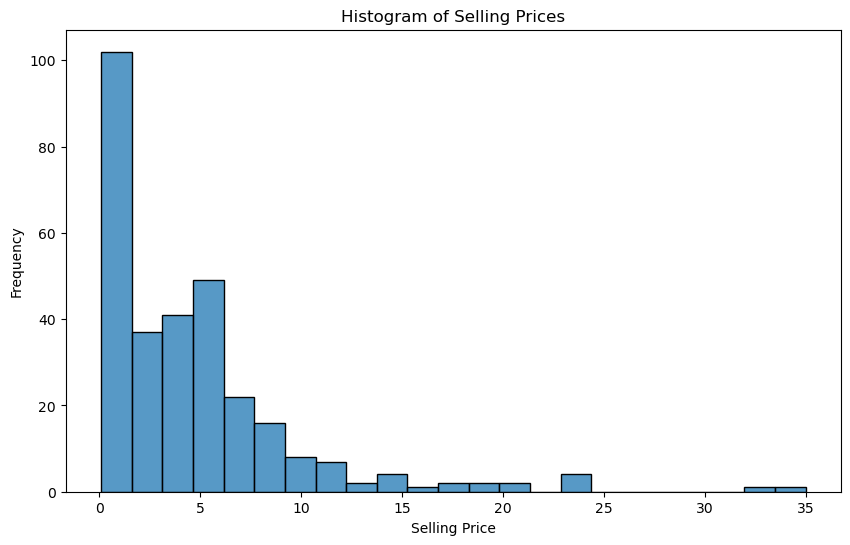

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(data=dataset, x='Selling_Price', kde=False)
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.title('Histogram of Selling Prices')
plt.show()

### Present Price Histogram

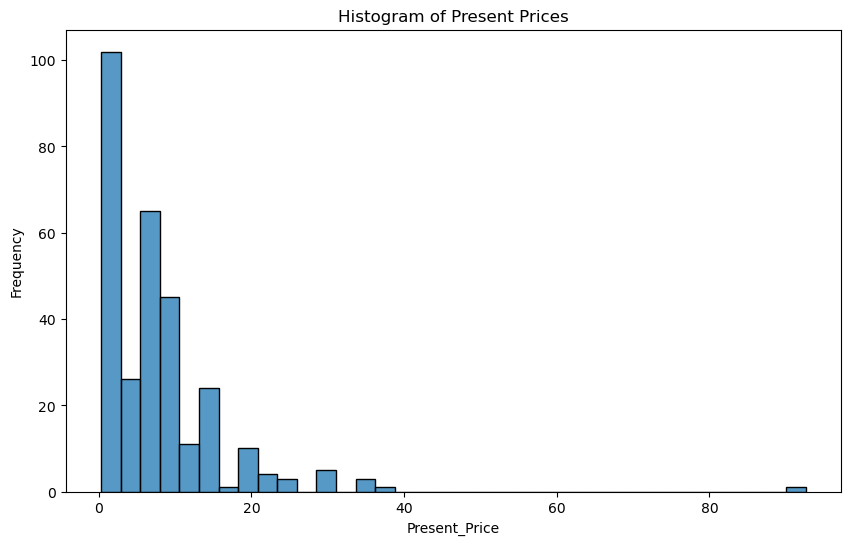

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(data=dataset, x='Present_Price', kde=False)
plt.xlabel('Present_Price')
plt.ylabel('Frequency')
plt.title('Histogram of Present Prices')
plt.show()

### Kms Driven Histogram

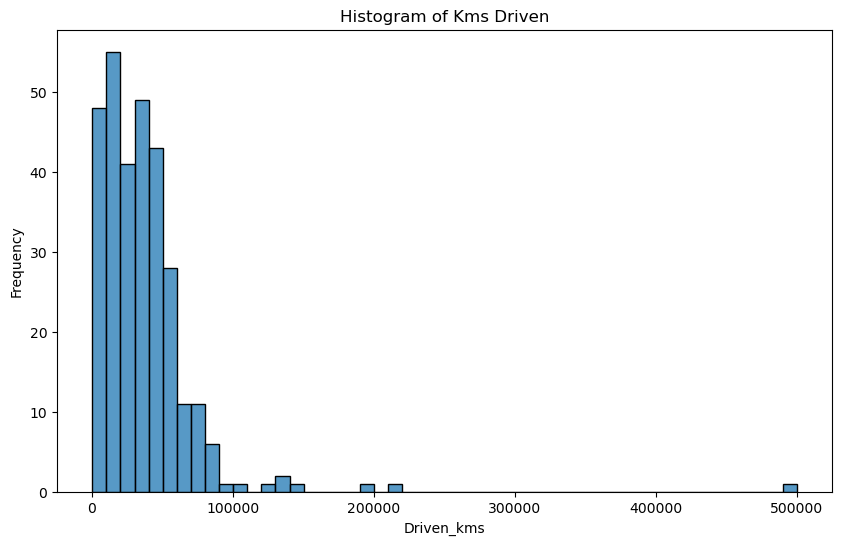

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(data=dataset, x='Driven_kms', kde=False)
plt.xlabel('Driven_kms')
plt.ylabel('Frequency')
plt.title('Histogram of Kms Driven')
plt.show()

### Distribution Of Cars By Fuel

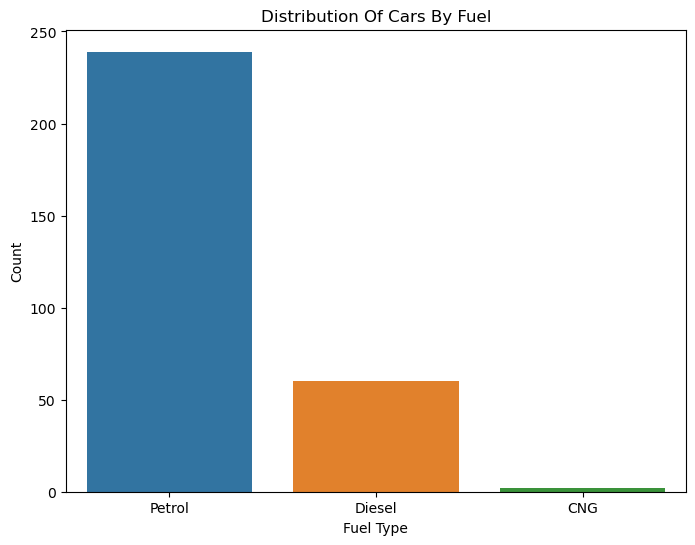

In [11]:
plt.figure(figsize=(8, 6))
sns.countplot(data=dataset, x='Fuel_Type')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.title('Distribution Of Cars By Fuel')
plt.show()

### Distribution of Cars by Seller

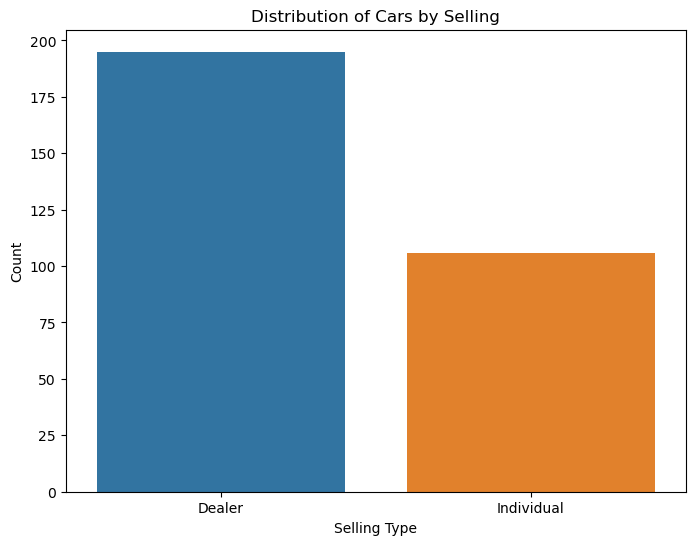

In [12]:
plt.figure(figsize=(8, 6))
sns.countplot(data=dataset, x='Selling_type')
plt.xlabel('Selling Type')
plt.ylabel('Count')
plt.title('Distribution of Cars by Selling')
plt.show()

### Distribution of Cars by Transmission

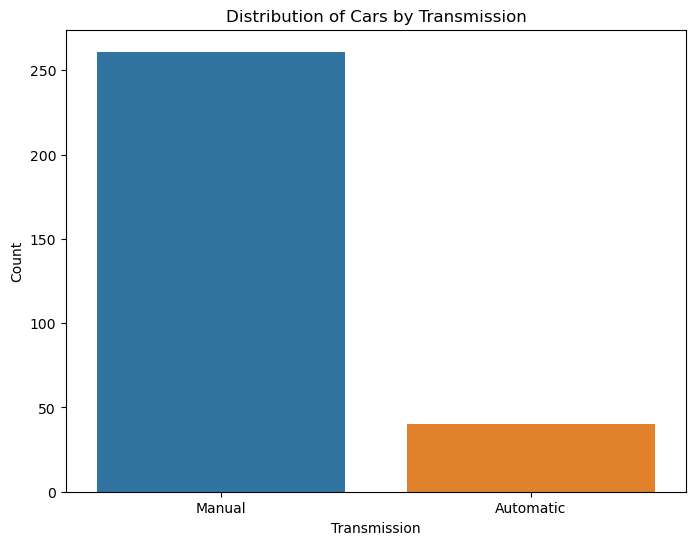

In [13]:
plt.figure(figsize=(8, 6))
sns.countplot(data=dataset, x='Transmission')
plt.xlabel('Transmission')
plt.ylabel('Count')
plt.title('Distribution of Cars by Transmission')
plt.show()

### Distribution Of Cars By Owner

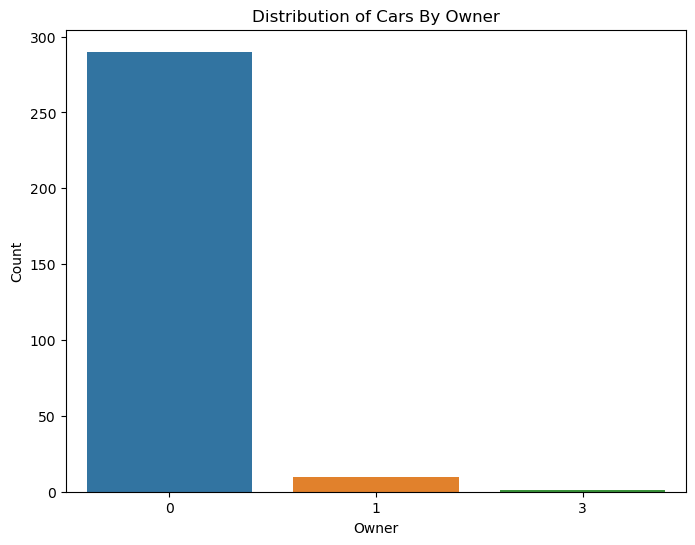

In [14]:
plt.figure(figsize=(8, 6))
sns.countplot(data=dataset, x='Owner')
plt.xlabel('Owner')
plt.ylabel('Count')
plt.title('Distribution of Cars By Owner')
plt.show()

# Details Of Categorical Data

In [15]:
print(dataset.Fuel_Type.value_counts())
print(dataset.Selling_type.value_counts())
print(dataset.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Selling_type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


# Encoding Categorical Data

In [16]:
dataset.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2}}, inplace = True)
dataset.replace({'Selling_type':{'Dealer':0, 'Individual':1}}, inplace = True)
dataset.replace({'Transmission':{'Manual':0, 'Automatic':1}}, inplace = True)

## After Encoding

In [17]:
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


# Separating The Training Data And Target Variable

In [18]:
x = dataset.drop(['Car_Name', 'Selling_Price'],axis=1)
y = dataset['Selling_Price']

## Printing The Training Data

In [19]:
print(x)

     Year  Present_Price  Driven_kms  Fuel_Type  Selling_type  Transmission  \
0    2014           5.59       27000          0             0             0   
1    2013           9.54       43000          1             0             0   
2    2017           9.85        6900          0             0             0   
3    2011           4.15        5200          0             0             0   
4    2014           6.87       42450          1             0             0   
..    ...            ...         ...        ...           ...           ...   
296  2016          11.60       33988          1             0             0   
297  2015           5.90       60000          0             0             0   
298  2009          11.00       87934          0             0             0   
299  2017          12.50        9000          1             0             0   
300  2016           5.90        5464          0             0             0   

     Owner  
0        0  
1        0  
2        0  

## Printing The Target Variable

In [20]:
print(y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


# Splitting The Dataset Into Training And Testing Sets

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(210, 7)
(91, 7)
(210,)
(91,)


# Linear Regression

## Training And Testing The Model

Error Report : 0.7934041253437378


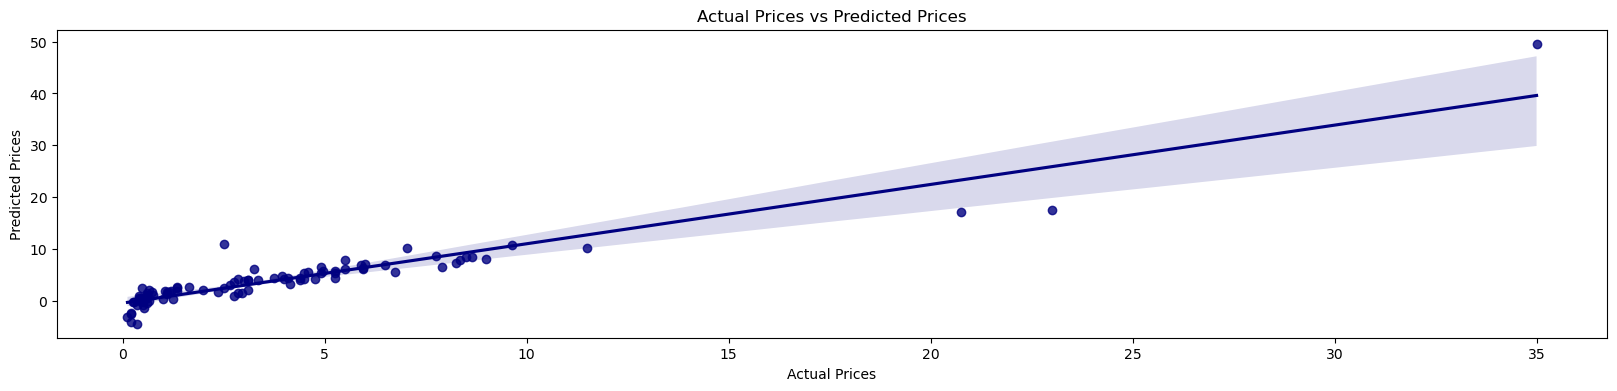

In [22]:
r2_scores = {}

model1 = LinearRegression()
model1.fit(x_train, y_train)
y_pred = model1.predict(x_test)
error = metrics.r2_score(y_test, y_pred)
r2_scores['Linear Regression'] = error
print(f'Error Report : {error}')

plt.figure(figsize=(20, 4))
sns.regplot(x=y_test, y=y_pred, color='navy')
#plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

## Saving The Model

In [23]:
import joblib
filename = 'linear_regression_model.pkl'
joblib.dump(model1, filename)
print(f"Model saved as {filename}")

Model saved as linear_regression_model.pkl


# Lasso Regression

## Training And Testing The Model

Error Report : 0.7549140720629689


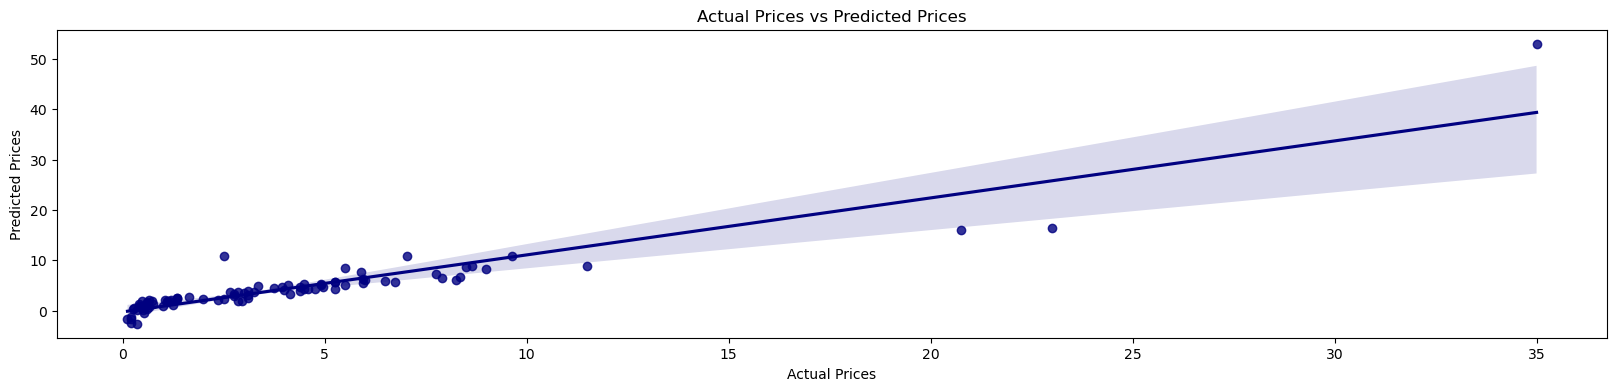

In [24]:
model2 = Lasso()
model2.fit(x_train, y_train)
y_pred = model2.predict(x_test)
error = metrics.r2_score(y_test, y_pred)
r2_scores['Lasso Regression'] = error
print(f'Error Report : {error}')

plt.figure(figsize=(20, 4))
sns.regplot(x=y_test, y=y_pred, color='navy')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

## Saving The Model

In [25]:
filename = 'lasso_regression_model.pkl'
joblib.dump(model2, filename)
print(f"Model saved as {filename}")

Model saved as lasso_regression_model.pkl


# Decision Tree Regressor

## Training And Testing The Model

Error Report : 0.9009328178045588


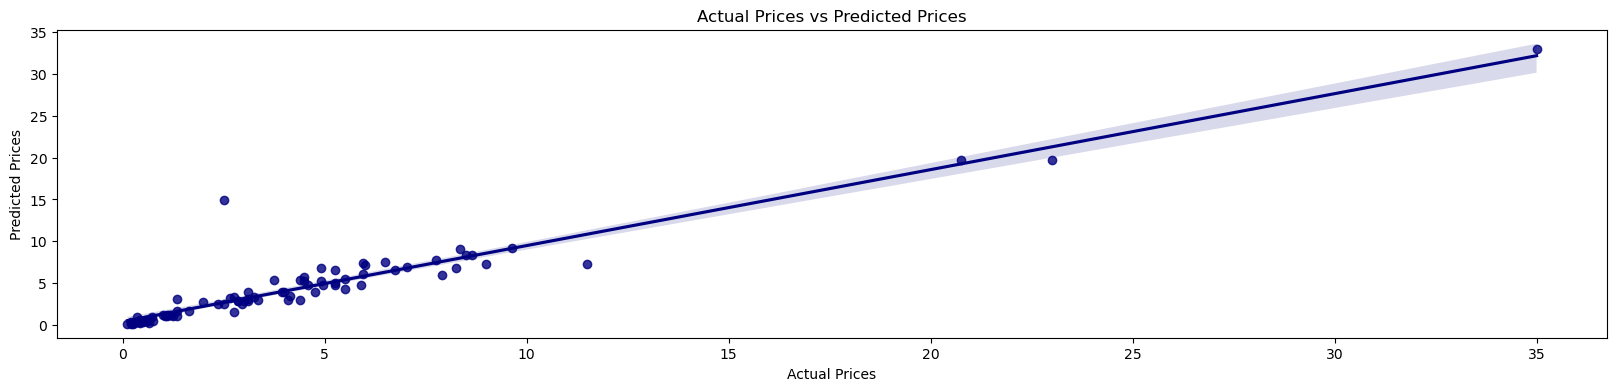

In [26]:
model3 = DecisionTreeRegressor()
model3.fit(x_train, y_train)
y_pred = model3.predict(x_test)
error = metrics.r2_score(y_test, y_pred)
r2_scores['Decision Tree'] = error
print(f'Error Report : {error}')

plt.figure(figsize=(20, 4))
sns.regplot(x=y_test, y=y_pred, color='navy')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

## Saving The Model

In [27]:
filename = 'decision_tree_model.pkl'
joblib.dump(model3, filename)
print(f"Model saved as {filename}")

Model saved as decision_tree_model.pkl


# Random Forest Regressor

## Training And Testing The Model

Error Report : 0.8477709865532723


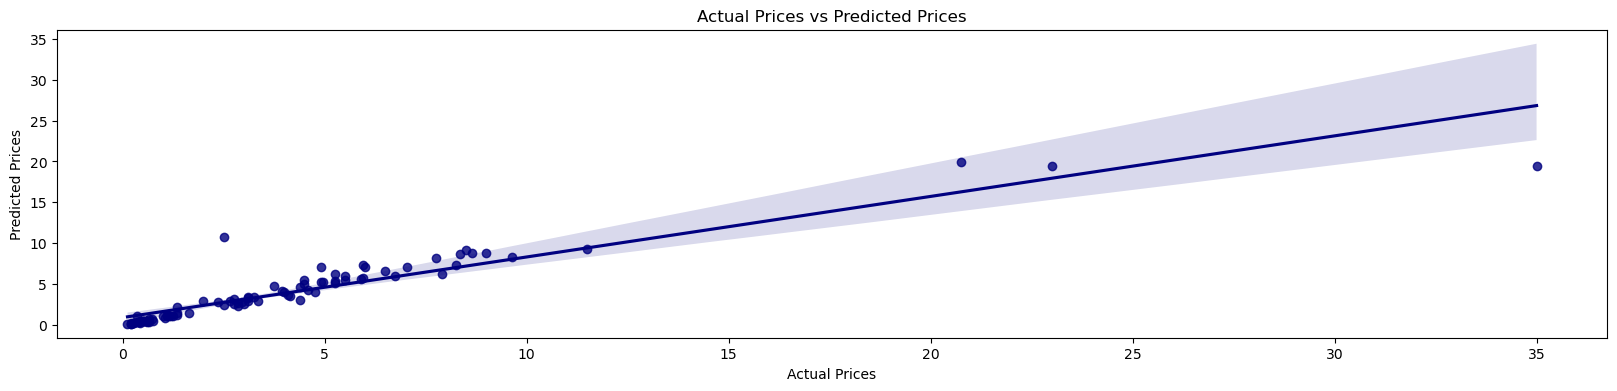

In [28]:
model4 = RandomForestRegressor()
model4.fit(x_train, y_train)
y_pred = model4.predict(x_test)
error = metrics.r2_score(y_test, y_pred)
r2_scores['Random Forest'] = error
print(f'Error Report : {error}')

plt.figure(figsize=(20, 4))
sns.regplot(x=y_test, y=y_pred, color='navy')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

## Saving The Model

In [29]:
filename = 'random_forest_model.pkl'
joblib.dump(model4, filename)
print(f"Model saved as {filename}")

Model saved as random_forest_model.pkl


# Support Vector Regressor

## Training And Testing The Model

Error Report : 0.820904100908419


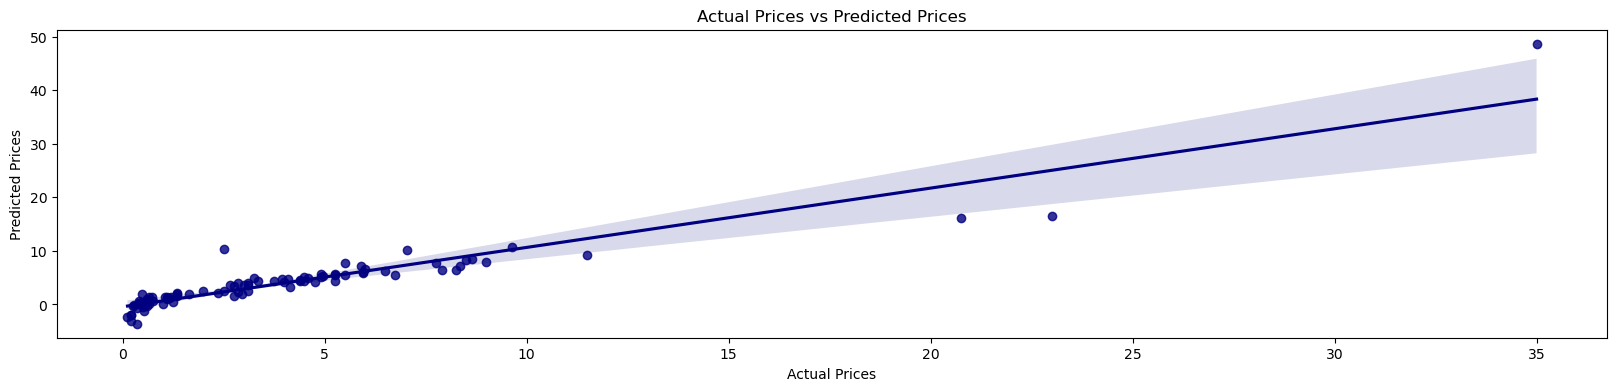

In [30]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
model5 = SVR(kernel='linear')  # Linear kernel for simplicity, you can try other kernels too
model5.fit(x_train_scaled, y_train)
y_pred = model5.predict(x_test_scaled)
error = metrics.r2_score(y_test, y_pred)
r2_scores['Support Vector Machine'] = error
print(f'Error Report : {error}')

plt.figure(figsize=(20, 4))
sns.regplot(x=y_test, y=y_pred, color='navy')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

## Saving The Model

In [31]:
filename = 'svr_model.pkl'
joblib.dump(model5, filename)
print(f"Model saved as {filename}")

Model saved as svr_model.pkl


# K-Nearest Neighbors Regressor

## Training And Testing The Model

Error Report : 0.9015833214749677


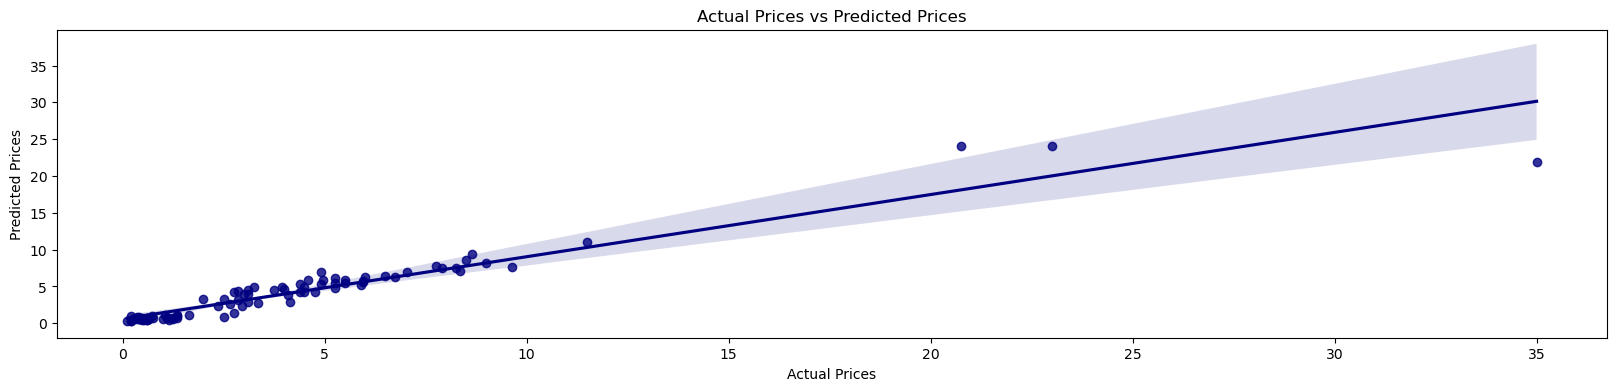

In [32]:
model6 = KNeighborsRegressor(n_neighbors=5)
model6.fit(x_train_scaled, y_train)
y_pred = model6.predict(x_test_scaled)
error = metrics.r2_score(y_test, y_pred)
r2_scores['KNN Neighbours'] = error
print(f'Error Report : {error}')

plt.figure(figsize=(20, 4))
sns.regplot(x=y_test, y=y_pred, color='navy')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

## Saving The Model

In [33]:
filename = 'knn_model.pkl'
joblib.dump(model6, filename)
print(f"Model saved as {filename}")

Model saved as knn_model.pkl


<h1>R<sup>2</sup> Score Of Different Models</h1>

In [34]:
for name, r2 in r2_scores.items():
    print(f"{name}: R-squared = {r2:.4f}")

Linear Regression: R-squared = 0.7934
Lasso Regression: R-squared = 0.7549
Decision Tree: R-squared = 0.9009
Random Forest: R-squared = 0.8478
Support Vector Machine: R-squared = 0.8209
KNN Neighbours: R-squared = 0.9016


# Taking User Input And Making Predictions

In [37]:
import warnings
import joblib
import pandas as pd
warnings.filterwarnings("ignore")

# Dictionary mapping model names to their filenames
model_files = {
    'Linear Regression': 'linear_regression_model.pkl',
    'Lasso Regression': 'lasso_regression_model.pkl',
    'Decision Tree': 'decision_tree_model.pkl',
    'Random Forest': 'random_forest_model.pkl',
    'Support Vector Machine': 'svr_model.pkl',
    'KNN Neighbours': 'knn_model.pkl'
}

# Function to let user choose a model
def choose_model():
    print("Choose a model to load:")
    for idx, model_name in enumerate(model_files.keys(), 1):
        print(f"{idx}. {model_name}")
    while True:
        try:
            choice = int(input("Enter your choice (1-6): "))
            if choice < 1 or choice > 6:
                raise ValueError("Please enter a number between 1 and 6.")
            break
        except ValueError as e:
            print(e)
    selected_model_name = list(model_files.keys())[choice - 1]
    selected_model_file = model_files[selected_model_name]
    return selected_model_name, selected_model_file

# Load the selected model
def load_selected_model(selected_model_file):
    # Load the selected model from the file
    loaded_model = joblib.load(selected_model_file)
    return loaded_model

# Function to get user input for car features
def get_user_input():
    print("Please enter the following car details:")
    Year = int(input("Enter Year of the car (e.g., 2017): "))
    Present_Price = float(input("Enter Present_Price (in lakhs): "))
    Kms_Driven = int(input("Enter Kms_Driven (in km): "))
    Fuel_Type = int(input("Enter Fuel_Type (0 for Petrol, 1 for Diesel, 2 for CNG): "))
    Seller_Type = int(input("Enter Seller_Type (0 for Dealer, 1 for Individual): "))
    Transmission = int(input("Enter Transmission (0 for Manual, 1 for Automatic): "))
    Owner = int(input("Enter Owner (0, 1, 2, or 3+): "))
    
    # Create a DataFrame from the user input
    user_input_df = pd.DataFrame([[Year, Present_Price, Kms_Driven, Fuel_Type, Seller_Type, Transmission, Owner]], 
                                 columns=['Year', 'Present_Price', 'Driven_kms', 'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'])
    return user_input_df

def make_prediction(loaded_model, selected_model_name):
    # Get user input
    user_input_df = get_user_input()
    
    if selected_model_name == 'Support Vector Machine' or selected_model_name == 'KNN Neighbours':
        # Create a StandardScaler object
        scaler = StandardScaler()
        
        # Scale the user input
        user_input_scaled = scaler.fit_transform(user_input_df)
        
        # Predict the selling price of the car using the loaded model
        predicted_price = loaded_model.predict(user_input_scaled)
    else:
        # Predict the selling price of the car using the loaded model
        predicted_price = loaded_model.predict(user_input_df)
    
    # Print the predicted price
    print(f"The predicted selling price for the given car details using {selected_model_name} is: {predicted_price[0]:.2f} lakhs")

# For the first time, load the selected model outside the loop
selected_model_name, selected_model_file = choose_model()
loaded_model = load_selected_model(selected_model_file)

while True:
    make_prediction(loaded_model, selected_model_name)
    while True:
        yes_or_no = input("Do you want to quit? (yes/no) ").lower()
        
        if yes_or_no == 'yes':
            break
        elif yes_or_no == 'no':
            while True:
                continue_or_change = input("Do you want to continue with the same model or choose a different model? (continue/change): ").lower()

                if continue_or_change == 'change':
                    print()
                    selected_model_name, selected_model_file = choose_model()
                    loaded_model = load_selected_model(selected_model_file)
                    break
                elif continue_or_change == 'continue':
                    break
                else:
                    print("Please enter either 'continue' or 'change'.")
            break
        else:
            print("Please enter either 'yes' or 'no'.")
    if yes_or_no == 'yes':
        break

Choose a model to load:
1. Linear Regression
2. Lasso Regression
3. Decision Tree
4. Random Forest
5. Support Vector Machine
6. KNN Neighbours
Enter your choice (1-6): 1
Please enter the following car details:
Enter Year of the car (e.g., 2017): 2015
Enter Present_Price (in lakhs): 8.82
Enter Kms_Driven (in km): 42367
Enter Fuel_Type (0 for Petrol, 1 for Diesel, 2 for CNG): 1
Enter Seller_Type (0 for Dealer, 1 for Individual): 0
Enter Transmission (0 for Manual, 1 for Automatic): 0
Enter Owner (0, 1, 2, or 3+): 0
The predicted selling price for the given car details using Linear Regression is: 7.01 lakhs
Do you want to quit? (yes/no) no
Do you want to continue with the same model or choose a different model? (continue/change): change

Choose a model to load:
1. Linear Regression
2. Lasso Regression
3. Decision Tree
4. Random Forest
5. Support Vector Machine
6. KNN Neighbours
Enter your choice (1-6): 5
Please enter the following car details:
Enter Year of the car (e.g., 2017): 2011
Ente